Let´s see the images of the dataset

In [5]:
# Importing necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
from skimage import io 
import os

In [26]:
# Let's see one image
im_1 = io.imread("in\Testing\glioma\Te-gl_0010.jpg")
im_1 # The images has a lot of 0 values for some pixeles, because its a radiography and they have a lot of black color.

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [27]:
im_1.max() # But it still has another kind of colors.

255

In [28]:
im_1.shape # In this case the images is squared with 512 pixeles and 3 color layers

(512, 512, 3)

In [29]:
# Let's try with anotherone
im_2 = io.imread("in\Testing\glioma\Te-gl_0066.jpg")
im_2.shape # all the glioma class images have the same shape

(512, 512, 3)

In [30]:
# Meningioma
im_3 = io.imread("in\Testing\meningioma\Te-me_0290.jpg")
im_3.shape # In this case the image has the same number of pixeles than glioma ones, but different layers

(512, 512)

In [31]:
# Let's try with another of Meningioma
im_4 = io.imread("in\Testing\meningioma\Te-me_0030.jpg")
im_4.shape # But no all of the images has the same shape

(303, 252, 3)

It's neccesary to reshape all the images to the same shape. I'll do this in the train part.

Text(0.5, 1.0, 'Glioma tumor of testing dataset')

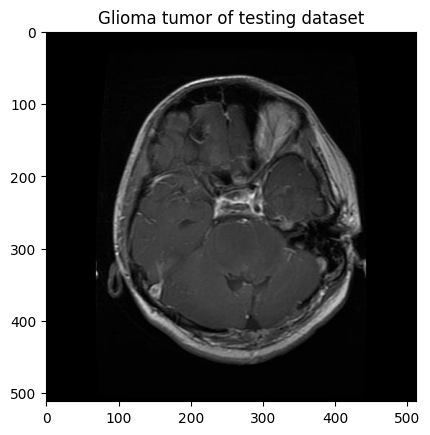

In [32]:
# Let's see one of them
plt.imshow(im_1) 
plt.title("Glioma tumor of testing dataset")

Text(0.5, 1.0, 'Glioma tumor')

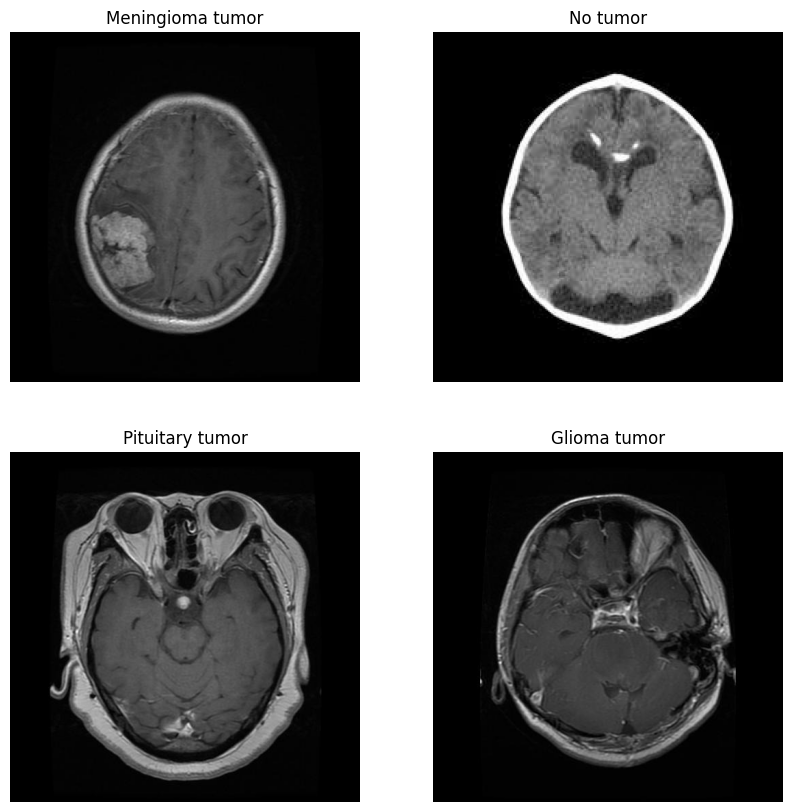

In [33]:
# Seeing some of them
fig = plt.figure(figsize=(10, 10))

# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = io.imread("in\Training\meningioma\Tr-me_0010.jpg")
Image2 = io.imread("in\Training/notumor\Tr-no_0010.jpg")
Image3 = io.imread("in\Testing\pituitary\Te-pi_0010.jpg")
Image4 = io.imread("in\Testing\glioma\Te-gl_0010.jpg")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Meningioma tumor")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("No tumor")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Pituitary tumor")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Glioma tumor")


Let's shape of the images

In [34]:
# The min and max shape of the images
def shape_images_from_folder(folder):

    pixel_1 = {}
    pixel_2 = {}

    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder,filename))
        pixel_1[filename] = []
        pixel_2[filename] = []
        pixel_1[filename].append(img.shape[0])
        pixel_2[filename].append(img.shape[1])

    print("Min row pixel is:", min(pixel_1.values()), "and Max row pixel is:", max(pixel_1.values()))
    print("key:", min(pixel_1, key=pixel_1.get), "and", "key:", max(pixel_1, key=pixel_1.get))
    print("Min col pixel is:", min(pixel_2.values()), "and Max col pixel is:", max(pixel_2.values()))
    print("key:", min(pixel_2, key=pixel_2.get), "and", "key:", max(pixel_2, key=pixel_2.get))
    
    return shape_images_from_folder

In [35]:
training_glioma = shape_images_from_folder("in\Training\glioma")

Min row pixel is: [512] and Max row pixel is: [512]
key: Tr-glTr_0000.jpg and key: Tr-glTr_0000.jpg
Min col pixel is: [512] and Max col pixel is: [512]
key: Tr-glTr_0000.jpg and key: Tr-glTr_0000.jpg


In [36]:
training_meningioma = shape_images_from_folder("in\Training\meningioma")
# p_tm_1, p_tm2 = training_glioma 

Min row pixel is: [207] and Max row pixel is: [1427]
key: Tr-me_0202.jpg and key: Tr-me_0585.jpg
Min col pixel is: [180] and Max col pixel is: [1275]
key: Tr-me_0580.jpg and key: Tr-me_0585.jpg


In [37]:
training_notumor = shape_images_from_folder("in\Training/notumor")

Min row pixel is: [168] and Max row pixel is: [1446]
key: Tr-no_0423.jpg and key: Tr-no_0138.jpg
Min col pixel is: [150] and Max col pixel is: [1920]
key: Tr-no_0419.jpg and key: Tr-no_1005.jpg


In [38]:
training_pituitary = shape_images_from_folder("in\Training\pituitary")

Min row pixel is: [202] and Max row pixel is: [1365]
key: Tr-pi_0031.jpg and key: Tr-pi_0038.jpg
Min col pixel is: [201] and Max col pixel is: [1365]
key: Tr-pi_0042.jpg and key: Tr-pi_0038.jpg


In [39]:
testing_glioma = shape_images_from_folder("in\Testing\glioma")

Min row pixel is: [512] and Max row pixel is: [512]
key: Te-glTr_0000.jpg and key: Te-glTr_0000.jpg
Min col pixel is: [512] and Max col pixel is: [512]
key: Te-glTr_0000.jpg and key: Te-glTr_0000.jpg


In [40]:
testing_meningioma = shape_images_from_folder("in\Testing\meningioma")

Min row pixel is: [195] and Max row pixel is: [1019]
key: Te-me_0059.jpg and key: Te-me_0066.jpg
Min col pixel is: [174] and Max col pixel is: [1149]
key: Te-me_0064.jpg and key: Te-me_0066.jpg


In [41]:
testing_notumor = shape_images_from_folder("in\Testing/notumor")

Min row pixel is: [168] and Max row pixel is: [680]
key: Te-no_0111.jpg and key: Te-no_0155.jpg
Min col pixel is: [150] and Max col pixel is: [680]
key: Te-no_0157.jpg and key: Te-no_0155.jpg


In [42]:
testing_pituitary = shape_images_from_folder("in\Testing\pituitary")

Min row pixel is: [256] and Max row pixel is: [512]
key: Te-pi_0063.jpg and key: Te-piTr_0000.jpg
Min col pixel is: [256] and Max col pixel is: [512]
key: Te-pi_0063.jpg and key: Te-piTr_0000.jpg


Are there any missing values?

In [10]:
img = io.imread("in\Testing\pituitary/Te-pi_0063.jpg")
np.isnan(img).sum()
#img.isna().sum()

0

In [15]:
# Counting missing values
def missing_images_from_folder(folder):

    pixel_null = {}

    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder,filename))
        key = filename
        missing = np.isnan(img).sum()
        if missing > 0:
            pixel_null[key] = []
            pixel_null[key].append(missing)

    print("The number of missing values are:", len (pixel_null), "and their keys are: ")
    print(pixel_null.keys())
    
    return shape_images_from_folder

In [16]:
training_glioma_NA = missing_images_from_folder("in\Training\glioma")

The number of missing values are: 0 and their keys are: 
dict_keys([])


In [17]:
training_meningioma_NA = missing_images_from_folder("in\Training\meningioma")

The number of missing values are: 0 and their keys are: 
dict_keys([])


In [18]:
training_notumor_NA = missing_images_from_folder("in\Training/notumor")

The number of missing values are: 0 and their keys are: 
dict_keys([])


In [19]:
training_pituitary_NA = missing_images_from_folder("in\Training\pituitary")

The number of missing values are: 0 and their keys are: 
dict_keys([])


In [21]:
testing_glioma_NA = missing_images_from_folder("in\Testing\glioma")

The number of missing values are: 0 and their keys are: 
dict_keys([])


In [22]:
testing_meningioma_NA = missing_images_from_folder("in\Testing\meningioma")

The number of missing values are: 0 and their keys are: 
dict_keys([])


In [23]:
testing_notumor_NA = missing_images_from_folder("in\Testing/notumor")

The number of missing values are: 0 and their keys are: 
dict_keys([])


In [24]:
testing_pituitary_NA = missing_images_from_folder("in\Testing\pituitary")

The number of missing values are: 0 and their keys are: 
dict_keys([])


Are the classes already balanced?

In [36]:
# Counting missing values
def length_images_from_folder(folder):

    list_files = []

    for filename in os.listdir(folder):
        list_files.append(filename)

    print("The number of files here are:", len(list_files), "and it is the:", (len(list_files)/5576)*100,"% of the total records")
    
    return shape_images_from_folder

In [37]:
training_glioma_length = length_images_from_folder("in\Training\glioma")

The number of files here are: 1321 and it is the: 23.690817790530847 % of the total records


In [38]:
training_meningioma_length = length_images_from_folder("in\Training\meningioma")

The number of files here are: 1339 and it is the: 24.013629842180777 % of the total records


In [39]:
training_notumor_length = length_images_from_folder("in\Training/notumor")

The number of files here are: 1595 and it is the: 28.604734576757533 % of the total records


In [40]:
training_pituitary_length = length_images_from_folder("in\Training\glioma")

The number of files here are: 1321 and it is the: 23.690817790530847 % of the total records


The images don't have any missing value. The training classes are already balance. But, they do have different shape, so it is necessary to take into account. 

Now that the images were explored, it's time to build and train the CNN model.